<h1 style='text-align: center;'> Bloons Tower Defense Speedrun strategy and Metagame analysis </h1>

<h3 style='text-align: center;'> By: Zak Khan and Joseph Kim </h3>

Bloons Tower Defense or BTD is a tower defense game series. Tower defense video games involve automated gameplay wherein the player builds a strategy to protect some entity on a map with specific characteristics. The strategies a player can devise are based on "towers" that are available for purchase or exchange of some sort. A tower is a stationary or constant predictable motion defense force through various effects ranging from direct combat, support, or condition effect shifting.

In the case of BTD, each iteration in the series introduced various battle and support monkey towers available in the monkey tower store. BTD 5 was the most widely available and popular BTD video game for many years after the fall of the flash game medium that BTD 1-3 utilized. Games of BTD 5 would consist of various "waves" of bloons (many variety of balloon like enemy entities) coming from a certain side of a given map. If enough of these bloons crossed through the entire stretch of the map's specific pathway, the player would lose HP until the game ended in failure. To fully succeed a specific game mode different conditions would be listed such as surviving for a certain number of rounds or popping a certain number of bloons. Additionally, there was an incredible variety in monkey tower options so diverse strategies emerged bringing more players to the game.

This successful game series continued its domination of the casual gamer marketspace with their latest entry into the series: BTD 6. This multiplatform title introduced many new ways to play the game, many new maps, and many new monkey towers. There were questions all over about what strategies developed in BTD 5 would still work in BTD 6.

We've mentioned how there are a plethora of different ways to play BTD, but one specific competitive system players began to use with BTD for a challenge was speedrunning. Speedrunning is a self imposed challenge gamers induce to see how quickly they can beat a game in a certain way or under specific conditions. BTD 5 speedruns had decent variety in their mode possibilities, but certain strategies outshone most others for optimized speedrunning. The typical "best" setup in BTD 5 would be to early game with many support towers that can mass pop weaker bloons, then when enough money built up, begin buying and fully upgrading super monkeys (a magic class monkey tower). There was certain nuances with this strategy, but generally, this was optimal.

## Introduction

We discovered a thread of reddit posts revealing all the pertinent stats of each monkey tower in BTD 6. We initially planned to use these posts by web scraping them of all their important data piece by piece for each type of tower in BTD 6, so that we could peform an analysis of all the towers in BTD 6. We want to use this data to compare potential outstanding strategies to the data of BTD 5. BTD 5 has plethora of data describing its optimization surrounding the super monkey power level. We aim to analyze whether this strategy held up in BTD 6, and if not, what is a potential new dominating tower or strategy. Lastly, we want to develop a system to predict what monkey tower or upgrade for that tower you may be looking at based on various factors. This would be actualized in the form of a decision tree, and any player could use the tree/flow chart to choose monkey towers based on what type of stats they want in their strategy. For example, they could ask questions that lead them to a ceramic bloon popping quick reloading monkey upgrade, and then alongside that they find a camo bloon striking monkey tower with low cost.

In [2]:
from bs4 import BeautifulSoup
import requests

In [ ]:
'''
url = 'https://www.reddit.com/r/btd6/comments/atomg3/advanced_popology_vol_1_primary_towers/'

text = requests.get(url).text
soup = BeautifulSoup(text, 'html.parser')

info = soup.get_text()

for row in info.splitlines():
    if row != '':
        print(row)
'''

As previously stated, we began our analysis by attempting a web scrape of these reddit posts, but due to the nature of these posts, and the already relatively small number of data points (monkey towers and their respective upgrades), we pivoted to manually creating a database of BTD 6 combat tower stats in Excel. We opted to only analyze combat monkey towers (primary, military, and magic) because support towers have very different stats, so they would not fit in the same table or dataset, and support tower usage should be relatively constant between BTD titles because their core functions don't change very much, and the same few support towers have always been meta. The core changes of BTD 6 lied in new combat monkey towers and nerfs or buffs to older battle monkey towers.

## Importing necessary packages and initializing dataframe

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive/')

sns.set_style("darkgrid")

Mounted at /content/drive/


Some goals:
best upgrade for each monkey tower (statistically), towers that are top in each stat, top 5 overall towers based on speed and damage output, optimized monkey strategy based on BTD 5 video, cluster analysis based on elbow and then blah blah OR DECISION TREE.

In [12]:
all_monkey = pd.read_excel("/content/drive/My Drive/Colab Notebooks/monkeys_and_costs.xlsx")
all_monkey[all_monkey['upgrade_path'] == 'P']

,monkey,cost,upgrade_path,type,dmg,pierce (p),boss_dmg (bd),MOAB-class_dmg (md),ceramic_dmg (cd),fortified_dmg (fd),lead,reload,camo_dect,activation_ability
16,Apex Plasma Master,350000,P,Primary,20,200,80,0,30.0,0,0,0.160,1,1
33,Glaive Dominus,325000,P,Primary,63,400,220,39,20.0,2,1,0.040,1,0
146,Navarch of the Seas,550000,P,Military,329,52,30,30,0.0,0,1,0.429,1,1
163,Goliath Doomship,900000,P,Military,21100,271,21100,0,0.0,0,1,0.110,0,1
260,Ascended Shadow,500000,P,Magic,48000,82,4900,0,0.0,0,1,0.217,1,0


Each entry in the database created is a monkey tower in the game. These monkey towers may be a base monkey buyable from the store during a game, or the tower can be any upgrade along each path that its base monkey has access to.
The variables retained from the reddit thread were as follows:

- monkey: what the monkey tower is titled in game
- cost: how much each monkey tower will cost in basic difficulty
- upgrade_path: whether the monkey tower is top, middle, or bottom upgrade path
- type: which type of monkey tower that entry is (primary, military, or magic)
- dmg: how much damage that upgrade or base monkey deals
- pierce: how many extra bloons behind the initial bloon attacked that monkey tower can strike through
- boss_dmg: how much extra damage that monkey tower can deal to certain bosses
- MOAB-class_dmg: how much extra damage that monkey tower can deal to MOABs
- ceramic_dmg: how much damage that monkey tower can deal to a ceramic bloon
- fortified_dmg: how much damage that monkey tower can deal to a fortified bloon
- lead: whether that monkey tower can deal damage to a lead balloon or not (boolean)
- reload: how quickly that monkey tower can consecutively pop bloons
- camo_dect: whether or not that monkey tower can identify and hit camoflouged bloons (boolean)
- activation_ability: whether or not that monkey tower has an extra ability to activate

Of these factors, some are only held by a small number of monkey towers, such as fortified_dmg or boss_dmg. We will remove some of these columns which may be deemed irrelevant or non impactful toward the overall statistical analysis regarding ideal speedrun strategies. boss_dmg will be removed because there is a very short list of towers that have this trait and none of them are especially significant.

## Descriptive statistics and visualizations of basic monkey tower stats

In [ ]:
# Functions to find descriptive stats we care about
def get_max(df, col):
    return df.loc[df[col].idxmax()]

def get_median(df, col):
    return df.loc[df[col] == df[col].median()]

stats = {}

# The highest value entry for each factor we care about
for col in ['cost', 'dmg', 'pierce (p)', 'MOAB-class_dmg (md)', 'ceramic_dmg (cd)']:
    stats[col] = get_max(all_monkey, col)

# The lowest reload time because this is the only variable that we want to be as low as possible
stats['reload'] = all_monkey.loc[all_monkey['reload'].idxmin()]

# Also printing the median value for each tower to compare pricings
medium_price = get_median(all_monkey, 'cost')

descriptive_stats = pd.DataFrame(stats)

# the medium price function revealed two monkey towers at the median price of 1450

# A new dataframe to visualize the monkey tower entries that are the best for each stat
descriptive_stats

,cost,dmg,pierce (p),MOAB-class_dmg (md),ceramic_dmg (cd),reload
monkey,Goliath Doomship,Ascended Shadow,Tsar Bomba,M.A.D,The Biggest One,Dark Champion
cost,900000,500000,30000,60000,36000,55555
upgrade_path,P,P,M,M,T,B
type,Military,Magic,Military,Military,Military,Magic
dmg,21100,48000,3000,3,25,2
pierce (p),271,82,5000,12,305,8
boss_dmg (bd),21100,4900,0,0,0,0
MOAB-class_dmg (md),0,0,0,568,20,3
ceramic_dmg (cd),0.0,0.0,0.0,4.0,40.0,2.0
fortified_dmg (fd),0,0,0,0,0,0


Here we discovered which monkey tower upgrade is optimized for each stat we gathered from the advanced popology reddit stat postings. The interesting portion of this data concerns the highest cost and the highest damage stats more than the other stats because those 2 are the primary 2 factors towards a high impact tower. And what is most interesting about the highest cost and highest damage monkey towers is that both towers are "paragons". Paragon monkey tower upgrades were introduced in BTD 6 and are one of the main ways that BTD 6 differentiates itself metagame wise from old entries in the series. Paragons are the basis for what may be different or variable in an optimized speedrunning strategy for BTD 6. We'll further explore this with other data analyses.

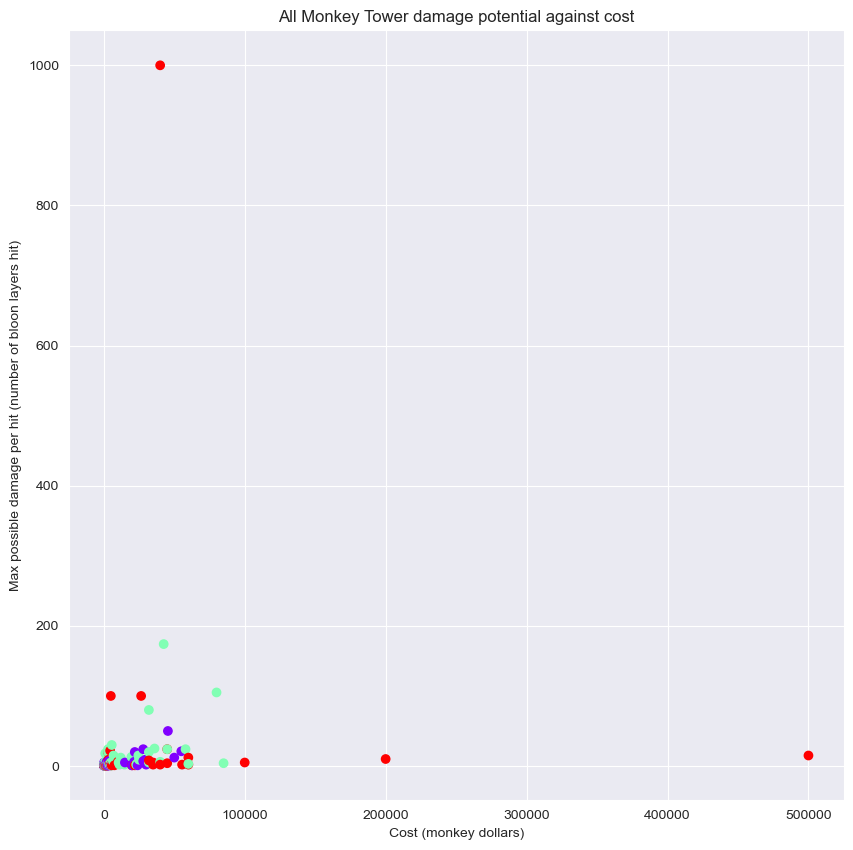

monkey                 Master Bomber
cost                           40000
upgrade_path                       B
type                           Magic
dmg                             1000
pierce (p)                        72
boss_dmg (bd)                      0
MOAB-class_dmg (md)                0
ceramic_dmg (cd)                 0.0
fortified_dmg (fd)                 0
lead                               1
reload                           0.7
camo_dect                          1
activation_ability                 0
Name: 259, dtype: object
monkey                 True Sun God
cost                         500000
upgrade_path                      T
type                          Magic
dmg                              15
pierce (p)                      100
boss_dmg (bd)                     0
MOAB-class_dmg (md)               0
ceramic_dmg (cd)                0.0
fortified_dmg (fd)                0
lead                              1
reload                         0.06
camo_dect                

In [ ]:
# Plot of monkey towers in order of cost against their damage
ordered_by_cost = all_monkey.sort_values('cost')

# Removing paragons and activation ability
ordered_by_cost = ordered_by_cost[ordered_by_cost['upgrade_path'] != 'P']
ordered_by_cost = ordered_by_cost[ordered_by_cost['activation_ability'] != 1]

new_types = []

for x in ordered_by_cost['type']:
    if x == 'Primary':
        new_types.append(0)
    elif x == 'Military':
        new_types.append(1)
    else:
        new_types.append(2)

new_types = np.array(new_types)

fig1 = plt.figure(figsize = (10, 10))

plt.scatter(ordered_by_cost.cost, ordered_by_cost.dmg, c = new_types, cmap = 'rainbow')
plt.title('All Monkey Tower damage potential against cost')
plt.xlabel('Cost (monkey dollars)')
plt.ylabel('Max possible damage per hit (number of bloon layers hit)')
plt.show()

# Showing highest non paragon damage and cost
print(get_max(ordered_by_cost, 'dmg'))
print(get_max(ordered_by_cost, 'cost'))

This displays the overall comparison between the cost and damage output of any entry in our data. This helps us visualize which towers may have the best "bang for their buck" in terms of raw power for cheap. We removed paragons and ability activation towers from this analysis because they have severe outliers and skew our visualization. Based on these results we found the highest damage and highest cost non paragon monkey towers. Interestingly, the highest cost tower matches the optimal tower from BTD 5, The True Sun God tower upgrade for the super monkey. This tower may still be the most expensive non paragon tower, but it is not the strongest as the highest damage tower is revealed to be the Master Bomber upgrade to the ninja monkey tower. Where the final super monkey upgrade shines the most is the reload speed on it because it has such a low reload speed to damage output. We will see if this still holds up against the paragons in following discussion.

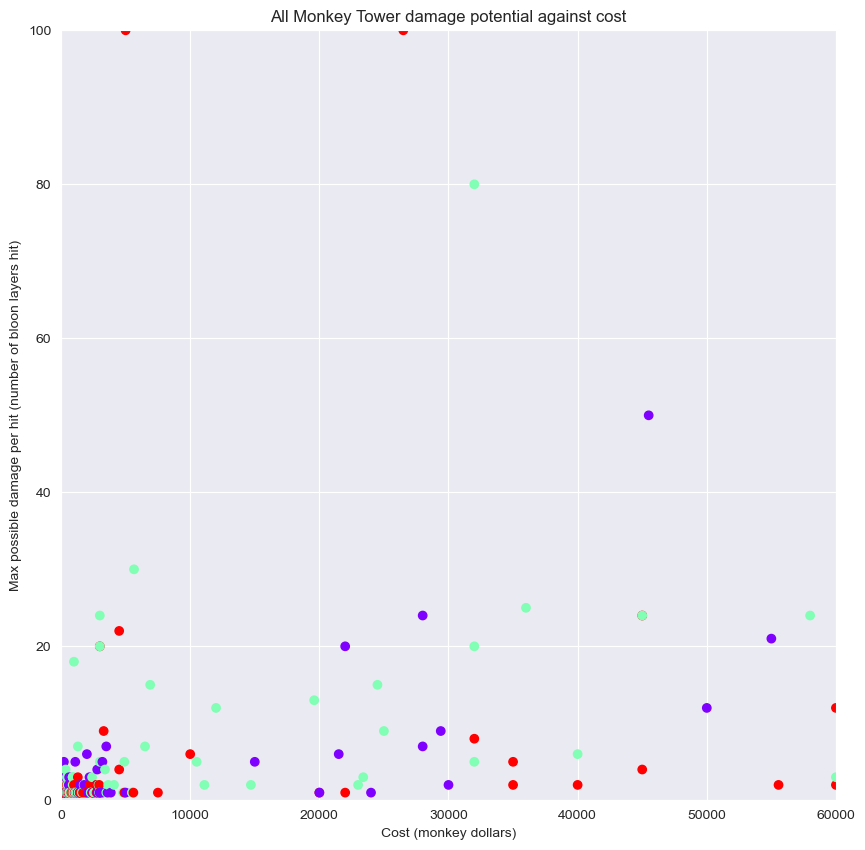

In [ ]:
# Additional graph zoomed in on clustered data between 0-100k cost and 0-200 damage

fig2 = plt.figure(figsize = (10, 10))

plt.scatter(ordered_by_cost.cost, ordered_by_cost.dmg, c = new_types, cmap = 'rainbow')
plt.title('All Monkey Tower damage potential against cost')
plt.xlabel('Cost (monkey dollars)')
plt.ylabel('Max possible damage per hit (number of bloon layers hit)')
plt.ylim((0, 100))
plt.xlim((-10, 60000))
plt.show()

This is a zoomed in visualization of the previous data because this a large cluster close to the origin due to the sheer costs of certain high power upgrades.

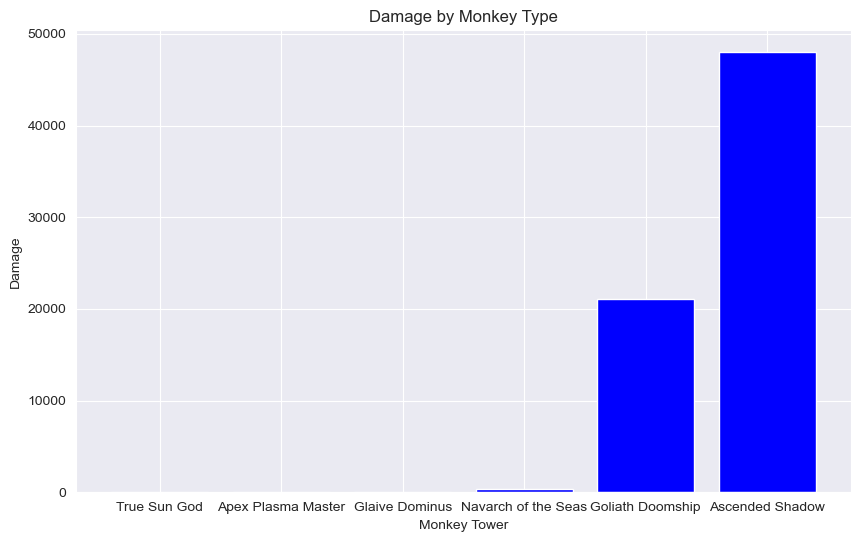

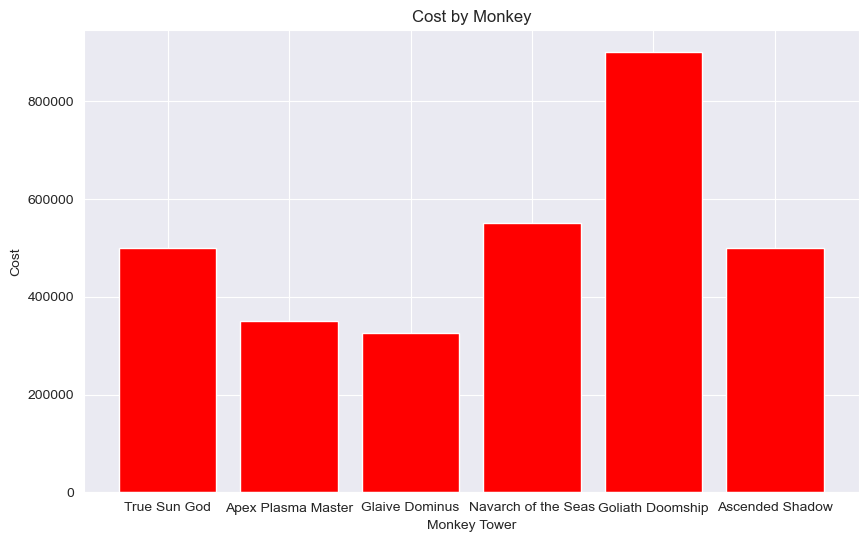

In [ ]:
# Graphs comparing old strategy core to new gen high power "paragons"

paragons = all_monkey[all_monkey['upgrade_path'] == 'P']
supermonk = all_monkey[all_monkey['monkey'] == 'True Sun God']
meta = pd.concat([supermonk, paragons])

plt.figure(figsize=(10, 6))
plt.bar(meta['monkey'], meta['dmg'], color='blue')
plt.xlabel('Monkey Tower')
plt.ylabel('Damage')
plt.title('Damage by Monkey Type')
plt.show()
plt.figure(figsize=(10, 6))
plt.bar(meta['monkey'], meta['cost'], color='red')
plt.xlabel('Monkey Tower')
plt.ylabel('Cost')
plt.title('Cost by Monkey')
plt.show()

These graphs display how powerful and expensive each paragon is relative to super monkey's maximized form (The True Sun God). True Sun God gameplay is core to BTD 5 speedrunning, as its high power relative to low reload rate made it very desirable for consistency in speed and destruction during fastpaced rounds. Here, however, we can see that there are some high power paragons that are cheaper, and some that are more expensive, and yet more powerful. This measure is rather rudimentary as a strong member of a strategy of this complexity relies on more factors than raw power and being cheap, but this is a decent measure to display that at least 2 paragons are leagues ahead of super monkey's stature for power. This displays an element of power creep in BTD 6, but also a refreshing outlook on new ways to play the entry in BTD.

## Decision Tree predicting standard monkey towers (purchasable from store)

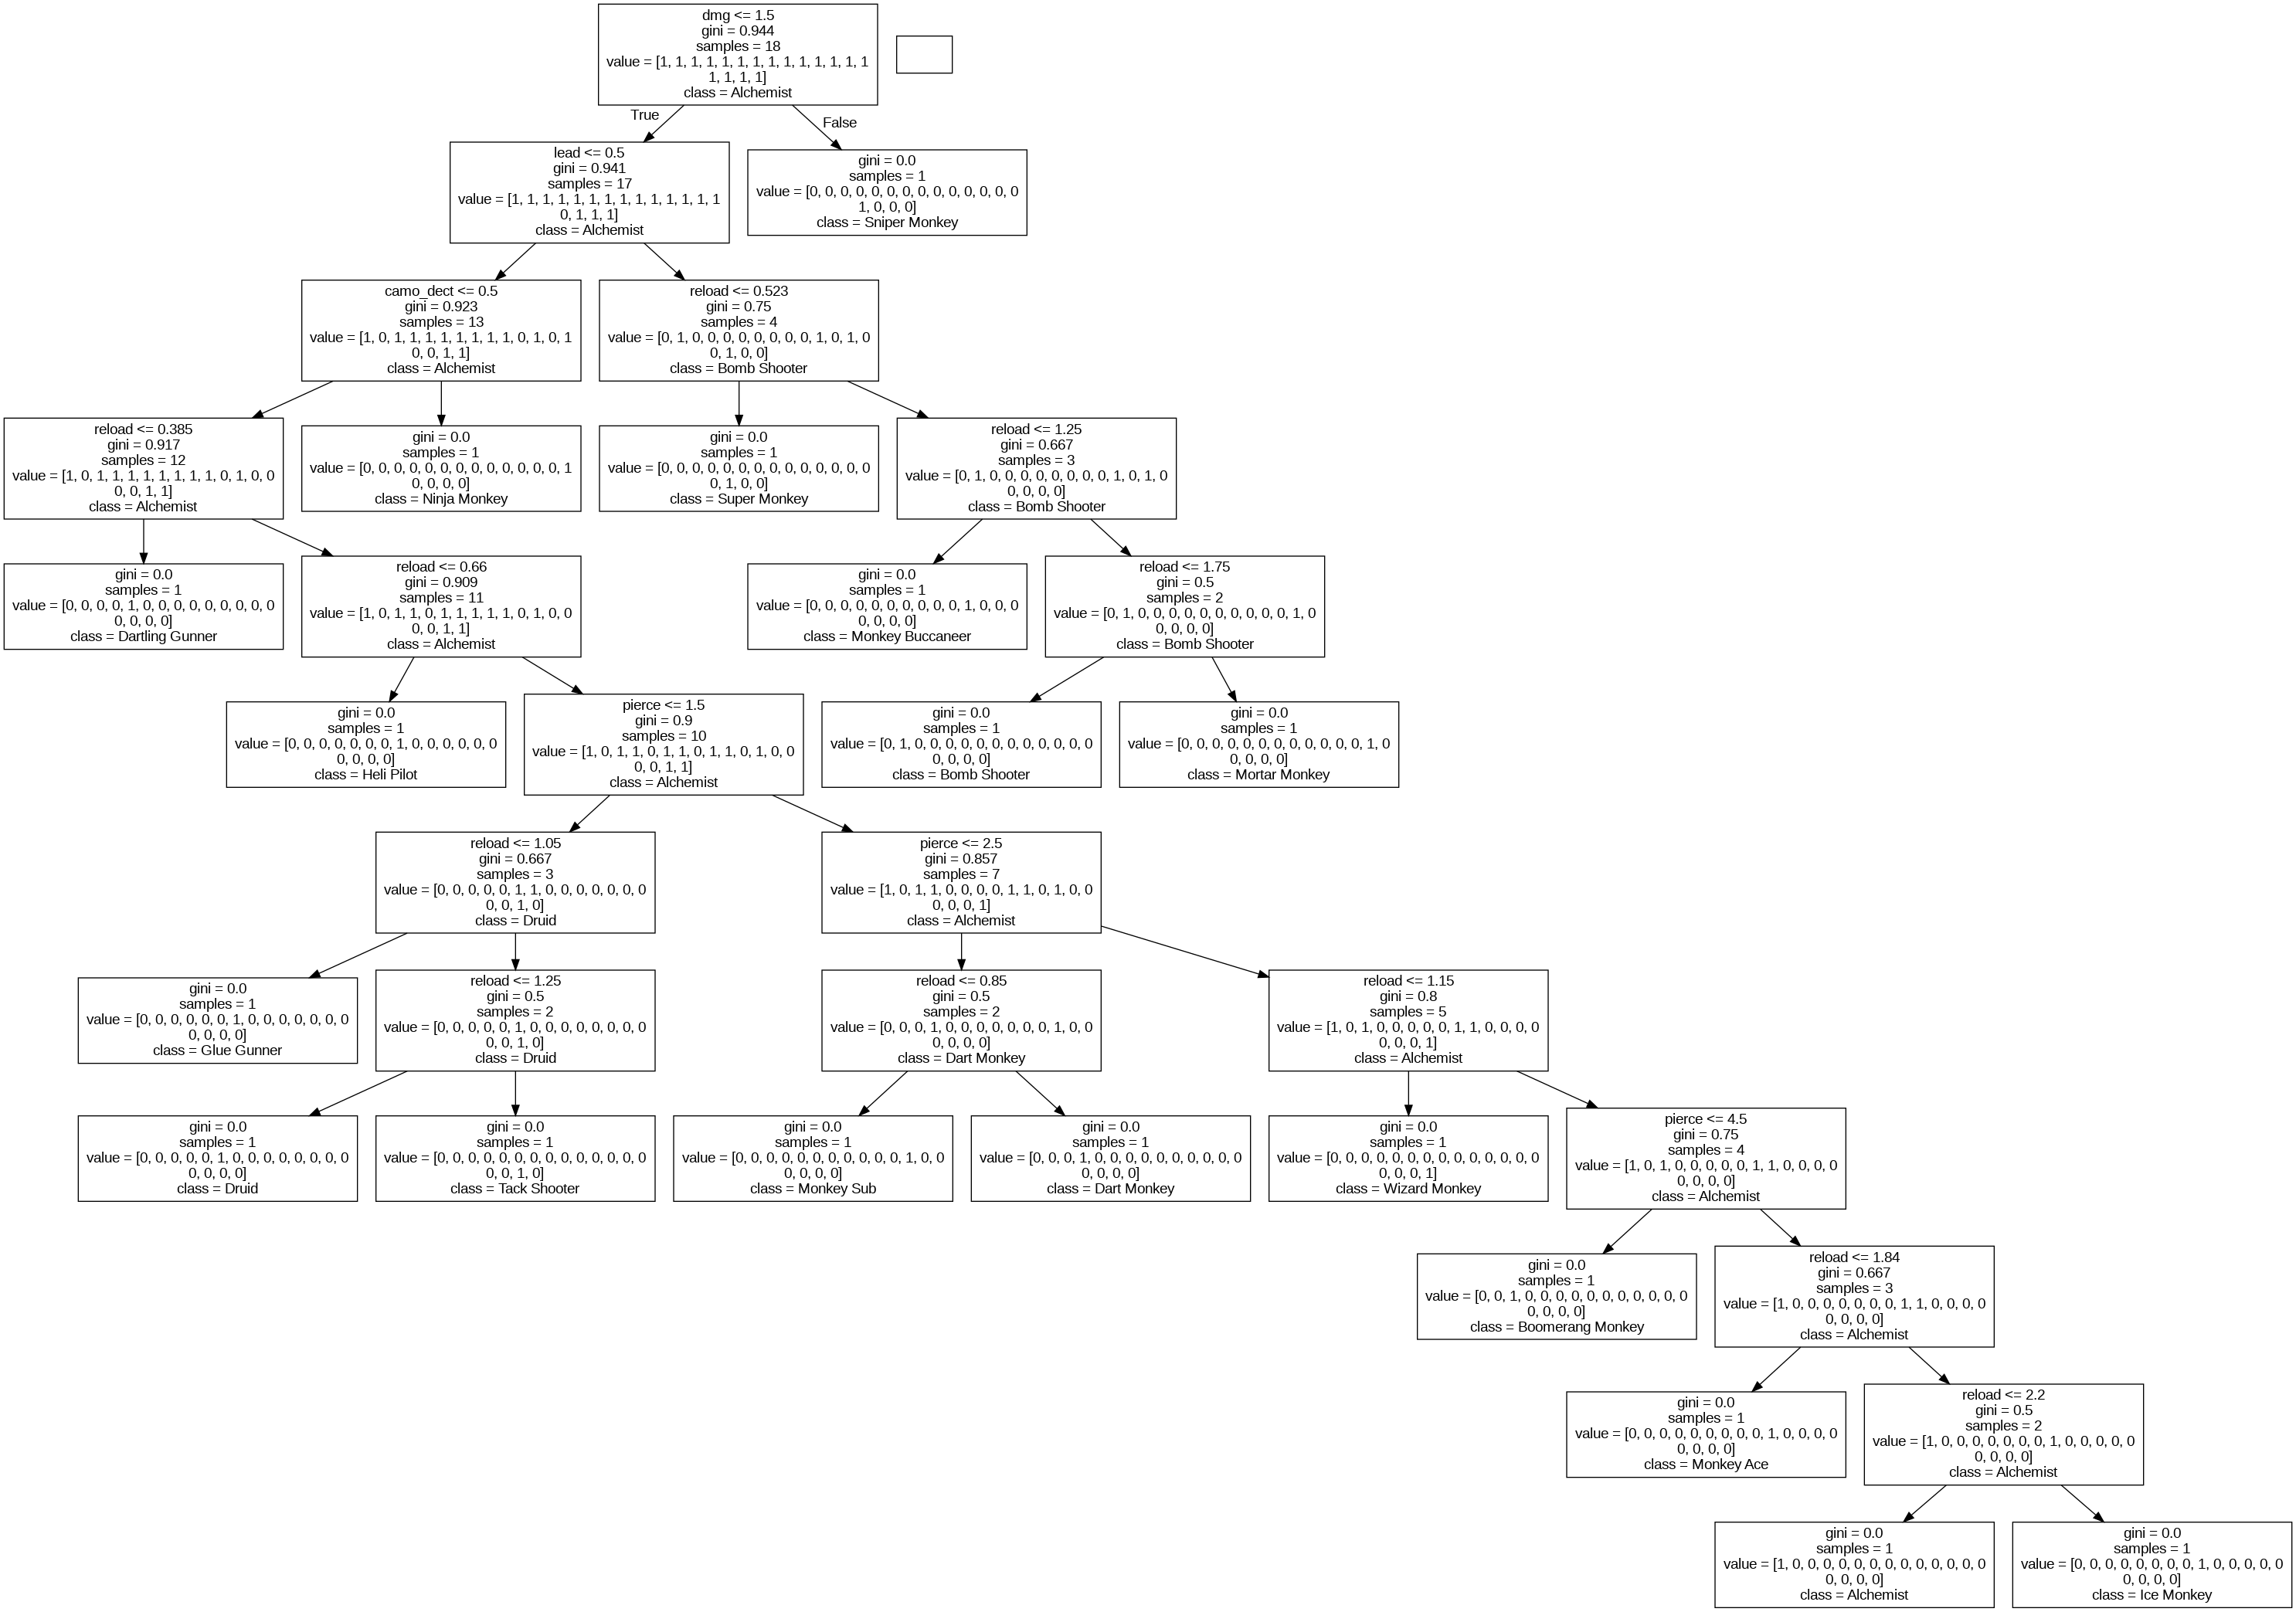

In [13]:
# Decision Tree Development

# Importing packages
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from IPython.display import Image
from sklearn import tree
import pydotplus
from sklearn.tree import export_graphviz


df = all_monkey.rename(columns={'pierce (p)': 'pierce', 'boss_dmg (bd)': 'boss_dmg', 'MOAB-class_dmg (md)': 'moab_dmg',
                          'ceramic_dmg (cd)': 'ceramic_dmg', 'fortified_dmg (fd)': 'fortified_dmg'}).iloc[:293]

# Cleaning data
df['cost'] = df['cost'].replace('[\$,]', '', regex=True).astype(float)
df['upgrade_path'] = np.where(df['upgrade_path'] == 'S', 1, 0)

# Only using base monkey towers
final_data = df[df['upgrade_path'] == 1]

# Variable setup
X = final_data[['pierce', 'reload', 'dmg',
                'boss_dmg', 'moab_dmg', 'ceramic_dmg', 'fortified_dmg', 'lead', 'reload',
                'camo_dect', 'activation_ability']]
Y = final_data['monkey']
decisiontree = DecisionTreeClassifier(random_state=0)
model = decisiontree.fit(X, Y)

# Decision Tree
decisiontree = DecisionTreeClassifier(random_state=0)
model = decisiontree.fit(X, Y)

dot_data = export_graphviz(model,
                           out_file=None,
                           feature_names=['pierce', 'reload', 'dmg',
                                          'boss_dmg', 'moab_dmg', 'ceramic_dmg', 'fortified_dmg', 'lead', 'reload',
                                          'camo_dect', 'activation_ability'],
                           class_names= list(sorted(final_data['monkey'])))
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('monkey_tree.png')


Image(graph.create_png())

The decision tree was initialized to gather information on every upgrade, but the tree became unruly due to the sheer number of choices. The computing power did not exist in our machines, so we opted to just create a model to predict base monkey towers. The tree did splendidly in its conception as it can accurately predict what base monkey tower you have depending on nuanced factors in our database.
A player or curious individual could use this model to choose what sort of monkey towers they want to prioritize in a strategy. This obviously only works for the combative monkeys we had in our data, but if we gathered data on support monkeys we could also create a predictive analysis for those towers. The system is highly useful in capturing all 18 base monkey towers specifically based on the few factors we fed the model. An ideal usage could be actualized when some person were attempting to find specific monkeys with certain factors beyond or below specific thresholds like being cheaper but with camo attack and ceramic attack dmaage. In further analysis, we would include all the monkeys offered in BTD 6 and all upgrades, but our machines cannot handle this task at this moment.

# Conclusion

BTD 6 is a diverse, fun experience for any skill player. Strategy games have a soft spot in my heart because I grew up playing these at a low level, but that grew my interest and coincided with my developing puzzle solving addiction. Strategy games exist as effectively highly nuanced puzzles with many moving pieces that change at the drop of a hat. A puzzle where the exact x y location of a tower will affect the outcome of the entire game down to the last wire is just about the most fun thing I can imagine.
BTD 6 and BTD 5 capture this magic perfectly with their ease of entry and high skill ceilings. BTD 5 has significantly less features and is easier to understand and get used to, but BTD 6 with its new abilities and powers or paragons creates a wholly new experience for all players alike. Speedrunning is just one fun way to explore these games, but it is the manner in which we opted to analyze them because it is a mode that players attempt to hone in on optimization of strategy. Many strategies can be victorious in BTD 6 and we haven't even scratched the surface of all the features available to a players in this discussion, but we have garnered some valid explanations for shifts in BTD 6 speedrunning optimization when compared to BTD 5.
BTD 5 speedrunning lies on the shoulders of super monkeys and their subsequent upgraded forms. This is not seen as much in BTD 6 because of the addition of paragons and heroes. We can witness this directly through the data we analyzed as paragons shown much more strongly than any super monkey or sun god we viewed. In addition, paragons hold both the highest cost and highest damage monkeys in our dataset.
We created the decision tree to supplement the analysis of this dataset to see whether this data was enough to create a predictive model that could assist in the development of further diverse strategies in BTD 6. This plan was ultimately a success because the model does work quite thoroughly and effectively.
BTD 6 is a very interesting game with all the variables in play, and a more diverse dataset would provide even more fascinating phenonmenon to analyze.